## Problem 1: Geocode shopping centers (5 points)

The aim of problems 1-3 is to find out **how many people live within a walking distance (1.5 km) from selected shopping centers in Helsinki**.

In problem 1 the task is to find out the addresses for a list of shopping centers and to geocode these addresses in order to represent them as points. The output should be stored in a Shapefile called `shopping_centers.shp` 

**Preparation:** Find out the addresses for following shopping centers from the internet, and write the addresses into a text file called `shopping_centers.txt`:

 - Itis
 - Forum
 - Iso-omena
 - Sello
 - Jumbo
 - REDI
 - Mall of Tripla 
 

`shopping_centers.txt` should have semicolon (`;`) as a separator, and the file should include the following columns:

- ``id`` (integer) containing an unique identifier for each shopping center
- ``name`` (string) of each shopping center
- ``addr`` (string) the address 


See and example of how to format the text file [in the lesson 3 materials](https://autogis-site.readthedocs.io/en/latest/notebooks/L3/geocoding_in_geopandas.html). Save (and upload) the text file into your exercise repository.

- Read `shopping_centers.txt` that you just created into a pandas DataFrame called ``data``:

In [1]:
!pip install geopandas

In [2]:
!pip install geopy

In [3]:
# Import modules
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

fp = "shopping_centers.txt"

# Read the data (replace "None" with your own code)
data = pd.read_csv(fp, sep=';')

In [4]:
#NON-EDITABLE TEST CELL
# Check your input data
print(data)

     id            name                                            addr
0  1000            Itis            Itäkatu 1-7, 00930 Helsinki, Finland
1  1001           Forum  Mannerheimintie 14–20, 00100 Helsinki, Finland
2  1002       Iso-omena           Piispansilta 11, 02230 Espoo, Finland
3  1003           Sello       Leppävaarankatu 3-9, 02600 Espoo, Finland
4  1004           Jumbo      Vantaanportinkatu 3, 01510 Vantaa, Finland
5  1005            REDI   Hermannin rantatie 5, 00580 Helsinki, Finland
6  1006  Mall of Tripla      Fredikanterassi 1, 00520 Helsinki, Finland


In [5]:
from geopandas.tools import geocode

- Geocode the addresses using the Nominatim geocoding service. Store the output in a variable called `geo`:

In [6]:
# Geocode the addresses using Nominatim
geo = geo = geocode(data['addr'], provider='nominatim', user_agent='gislover', timeout=4)

In [7]:
#NON-EDITABLE TEST CELL
# Check the geocoded output
print(geo)

                    geometry  \
0  POINT (25.08294 60.21170)   
1  POINT (24.93828 60.16878)   
2  POINT (24.73779 60.16294)   
3  POINT (24.81042 60.21752)   
4  POINT (24.96282 60.29245)   
5  POINT (24.97904 60.18702)   
6   GEOMETRYCOLLECTION EMPTY   

                                             address  
0  Kauppakeskus Itis, 1-7, Itäkatu, Itäkeskus, Va...  
1  Salaattiasema, 14-20, Mannerheimintie, Keskust...  
2  Sports Academy, 11, Piispansilta, Matinkylän k...  
3  Lasten kappeli Arkki, 3-9, Leppävaarankatu, Sä...  
4  Stockmann, 3, Vantaanportinkatu, Vantaanportti...  
5  Silta, 5, Hermannin rantatie, Verkkosaari, Kal...  
6                                               None  


In [8]:
#NON-EDITABLE TEST CELL
# Check the data type (should be a GeoDataFrame!)
print(type(geo))

<class 'geopandas.geodataframe.GeoDataFrame'>


Check that the coordinate reference system of the geocoded result is correctly defined, and **reproject the layer into ETRS GK-25** (EPSG:3879):

In [9]:
geo = geo.to_crs(epsg=3879)

In [10]:
#NON-EDITABLE TEST CELL
# Check layer crs
print(geo.crs)

epsg:3879


- Make a table join between the geocoded addresses (``geo``) and the original addresses (``data``) in order to link the numerical coordinates and  the `id` and `name` of each shopping center. 
- Store the output in a variable called ``geodata`` 


In [11]:
# Join the tables
geodata = geo.join(data)

In [12]:
#NON-EDITABLE TEST CELL
# Check the join output
print(geodata.head())

                           geometry  \
0  POINT (25504598.602 6677662.109)   
1  POINT (25496573.542 6672878.360)   
2  POINT (25485440.532 6672255.563)   
3  POINT (25489491.076 6678322.265)   
4  POINT (25497943.932 6686656.982)   

                                             address    id       name  \
0  Kauppakeskus Itis, 1-7, Itäkatu, Itäkeskus, Va...  1000       Itis   
1  Salaattiasema, 14-20, Mannerheimintie, Keskust...  1001      Forum   
2  Sports Academy, 11, Piispansilta, Matinkylän k...  1002  Iso-omena   
3  Lasten kappeli Arkki, 3-9, Leppävaarankatu, Sä...  1003      Sello   
4  Stockmann, 3, Vantaanportinkatu, Vantaanportti...  1004      Jumbo   

                                             addr  
0            Itäkatu 1-7, 00930 Helsinki, Finland  
1  Mannerheimintie 14–20, 00100 Helsinki, Finland  
2           Piispansilta 11, 02230 Espoo, Finland  
3       Leppävaarankatu 3-9, 02600 Espoo, Finland  
4      Vantaanportinkatu 3, 01510 Vantaa, Finland  


- Save the output as a Shapefile called `shopping_centers.shp` 

In [13]:
# Define output filepath
out_fp = "shopping_centers.shp"

# Save file
geodata.to_file(out_fp)

In [14]:
#NON-EDITABLE TEST CELL
# Print info about output file
print("Geocoded output is stored in this file:", out_fp)

Geocoded output is stored in this file: shopping_centers.shp


## Problem 2: Create buffers around shopping centers (5 points)

Let's continue with our case study and calculate a 1.5 km buffer around the geocoded points. 


- Start by creating a new column called `buffer` to ``geodata`` GeoDataFrame:

In [15]:
geodata = geodata.assign(buffer=0)

In [16]:
geodata

,geometry,address,id,name,addr,buffer
0,POINT (25504598.602 6677662.109),"Kauppakeskus Itis, 1-7, Itäkatu, Itäkeskus, Va...",1000,Itis,"Itäkatu 1-7, 00930 Helsinki, Finland",0
1,POINT (25496573.542 6672878.360),"Salaattiasema, 14-20, Mannerheimintie, Keskust...",1001,Forum,"Mannerheimintie 14–20, 00100 Helsinki, Finland",0
2,POINT (25485440.532 6672255.563),"Sports Academy, 11, Piispansilta, Matinkylän k...",1002,Iso-omena,"Piispansilta 11, 02230 Espoo, Finland",0
3,POINT (25489491.076 6678322.265),"Lasten kappeli Arkki, 3-9, Leppävaarankatu, Sä...",1003,Sello,"Leppävaarankatu 3-9, 02600 Espoo, Finland",0
4,POINT (25497943.932 6686656.982),"Stockmann, 3, Vantaanportinkatu, Vantaanportti...",1004,Jumbo,"Vantaanportinkatu 3, 01510 Vantaa, Finland",0
5,POINT (25498837.156 6674909.983),"Silta, 5, Hermannin rantatie, Verkkosaari, Kal...",1005,REDI,"Hermannin rantatie 5, 00580 Helsinki, Finland",0
6,GEOMETRYCOLLECTION EMPTY,None,1006,Mall of Tripla,"Fredikanterassi 1, 00520 Helsinki, Finland",0


- Calculate a 1.5 km buffer for each geocoded point. Store the buffer geometry in the new `buffer` column.

Here, you can use the [GeoDataFrame buffer() method](http://geopandas.org/geometric_manipulations.html#GeoSeries.buffer), which uses Shapely's [buffer](http://toblerity.org/shapely/manual.html#object.buffer) in the bacground. You only need to use the `distance` -parameter, don't worry about the other parameters.

In [17]:
geodata['buffer'] = geodata.buffer(distance=1500)

In [18]:
#NON-EDITABLE TEST CELL
print(geodata.head())

                           geometry  \
0  POINT (25504598.602 6677662.109)   
1  POINT (25496573.542 6672878.360)   
2  POINT (25485440.532 6672255.563)   
3  POINT (25489491.076 6678322.265)   
4  POINT (25497943.932 6686656.982)   

                                             address    id       name  \
0  Kauppakeskus Itis, 1-7, Itäkatu, Itäkeskus, Va...  1000       Itis   
1  Salaattiasema, 14-20, Mannerheimintie, Keskust...  1001      Forum   
2  Sports Academy, 11, Piispansilta, Matinkylän k...  1002  Iso-omena   
3  Lasten kappeli Arkki, 3-9, Leppävaarankatu, Sä...  1003      Sello   
4  Stockmann, 3, Vantaanportinkatu, Vantaanportti...  1004      Jumbo   

                                             addr  \
0            Itäkatu 1-7, 00930 Helsinki, Finland   
1  Mannerheimintie 14–20, 00100 Helsinki, Finland   
2           Piispansilta 11, 02230 Espoo, Finland   
3       Leppävaarankatu 3-9, 02600 Espoo, Finland   
4      Vantaanportinkatu 3, 01510 Vantaa, Finland   

       

In [19]:
#NON-EDITABLE TEST CELL
# Check the data type of the first value in the buffer-column
print(type(geodata.at[0,'buffer']))

<class 'shapely.geometry.polygon.Polygon'>


In [20]:
#NON-EDITABLE TEST CELL
# Check the areas of your buffers in km^2
print(round(gpd.GeoSeries(geodata["buffer"]).area / 1000000))

0    7.0
1    7.0
2    7.0
3    7.0
4    7.0
5    7.0
6    0.0
dtype: float64


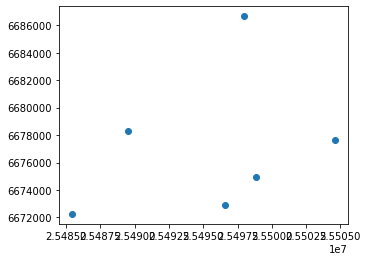

In [21]:
geodata.plot()

- Replace the values in `geometry` column with the values of `buffer` column:

In [22]:
geodata['geometry'] = geodata['buffer']

In [23]:
#NON-EDITABLE TEST CELL
print(geodata.head())

                                            geometry  \
0  POLYGON ((25506098.602 6677662.109, 25506091.3...   
1  POLYGON ((25498073.542 6672878.360, 25498066.3...   
2  POLYGON ((25486940.532 6672255.563, 25486933.3...   
3  POLYGON ((25490991.076 6678322.265, 25490983.8...   
4  POLYGON ((25499443.932 6686656.982, 25499436.7...   

                                             address    id       name  \
0  Kauppakeskus Itis, 1-7, Itäkatu, Itäkeskus, Va...  1000       Itis   
1  Salaattiasema, 14-20, Mannerheimintie, Keskust...  1001      Forum   
2  Sports Academy, 11, Piispansilta, Matinkylän k...  1002  Iso-omena   
3  Lasten kappeli Arkki, 3-9, Leppävaarankatu, Sä...  1003      Sello   
4  Stockmann, 3, Vantaanportinkatu, Vantaanportti...  1004      Jumbo   

                                             addr  \
0            Itäkatu 1-7, 00930 Helsinki, Finland   
1  Mannerheimintie 14–20, 00100 Helsinki, Finland   
2           Piispansilta 11, 02230 Espoo, Finland   
3       Lepp

Optional: at this point, you can drop out unnecessary columns from the geodataframe. In the next problem, 
we will only need these columns: `'id', 'name', 'geometry'`

In [24]:
geodata = geodata[['id', 'name', 'geometry']]

In [25]:
geodata

,id,name,geometry
0,1000,Itis,"POLYGON ((25506098.602 6677662.109, 25506091.3..."
1,1001,Forum,"POLYGON ((25498073.542 6672878.360, 25498066.3..."
2,1002,Iso-omena,"POLYGON ((25486940.532 6672255.563, 25486933.3..."
3,1003,Sello,"POLYGON ((25490991.076 6678322.265, 25490983.8..."
4,1004,Jumbo,"POLYGON ((25499443.932 6686656.982, 25499436.7..."
5,1005,REDI,"POLYGON ((25500337.156 6674909.983, 25500329.9..."
6,1006,Mall of Tripla,POLYGON EMPTY


## Problem 3: How many people live near shopping centers? (5 points)

Last step in our analysis is to make a spatial join between our buffer layer and population data in order to find out **how many people live near each shopping center**. We will use the same data as we did during [lesson 3](https://automating-gis-processes.github.io/site/notebooks/L3/spatial-join.html#Spatial-join); **a Population Grid** that is available via the HSY wfs. 

Alternatively, you can also download the data from the [Helsinki Region Infoshare (HRI)](https://hri.fi/data/en_GB/dataset/vaestotietoruudukko) on your computer and read it in using geopandas.

The coordinate reference system of the population grid is **ETRS GK-25 (EPSG:3879)**.


**Steps:**

- Read the population grid into a geodataframe

- Select only the useful columns from the population grid: ``'asukkaita'`` (=population count per grid square) and ``'geometry'`` 

- Make a spatial join between your buffered point layer and population grid layer. Join the information now from buffer layer **into the population grid layer**

- Group the joined layer by shopping center index

- Calculate the sum of population living within 1.5 km for each shopping center.

**Finally:**

- Print out the population living within 1.5 km from each shopping center:

     - Itis
     - Forum
     - Iso-omena
     - Sello
     - Jumbo
     - REDI
     - Mall of Tripla
     
**Final print out should contain both the shopping center name and population count**, for example: `25858 people live within 1.5 km from Iso-Omena`.

*Feel free to divide your solution into several codeblocks! Remember to comment your code  :)*

In [26]:
!pip install geojson

In [27]:
# Read population grid data for 2018 into a variable `pop`. 
# Remember to check the crs info! 
import geopandas as gpd
from pyproj import CRS
import requests
import geojson

# Specify the url for web feature service
url = 'https://kartta.hsy.fi/geoserver/wfs'

# Specify parameters (read data in json format). 
# Available feature types in this particular data source: http://geo.stat.fi/geoserver/vaestoruutu/wfs?service=wfs&version=2.0.0&request=describeFeatureType
params = dict(service='WFS', 
              version='2.0.0', 
              request='GetFeature', 
              typeName='asuminen_ja_maankaytto:Vaestotietoruudukko_2018', 
              outputFormat='json')

# Fetch data from WFS using requests
r = requests.get(url, params=params)

# Create GeoDataFrame from geojson
pop = gpd.GeoDataFrame.from_features(geojson.loads(r.content))

In [28]:
pop.crs

In [29]:
# Define crs
pop.crs = CRS.from_epsg(3879).to_wkt()

In [30]:
pop.crs

<Projected CRS: EPSG:3879>
Name: ETRS89 / GK25FIN
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Finland - nominally onshore between 24°30'E and 25°30'E but may be used in adjacent areas if a municipality chooses to use one zone over its whole extent.
- bounds: (24.5, 59.94, 25.5, 68.9)
Coordinate Operation:
- name: Finland Gauss-Kruger zone 25
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [31]:
geodata.crs == pop.crs

True

In [32]:
#NON-EDITABLE TEST CELL
# Check your input data
print("Number of rows:", len(pop))
print(pop.head(3))

Number of rows: 3167
                                            geometry  index  asukkaita  \
0  MULTIPOLYGON Z (((25476499.999 6674248.999 0.0...   3342        108   
1  MULTIPOLYGON Z (((25476749.997 6674498.998 0.0...   3503        273   
2  MULTIPOLYGON Z (((25476999.994 6675749.004 0.0...   3660        239   

   asvaljyys  ika0_9  ika10_19  ika20_29  ika30_39  ika40_49  ika50_59  \
0         45      11        23         6         7        26        17   
1         35      35        24        52        62        40        26   
2         34      46        24        24        45        33        30   

   ika60_69  ika70_79  ika_yli80  
0         8         6          4  
1        25         9          0  
2        25        10          2  


In [33]:
# Change the name of a column
pop = pop.rename(columns={'asukkaita': 'pop18'})

# Subset columns
pop = pop[["pop18", "geometry"]]

In [34]:
pop.head()

,pop18,geometry
0,108,MULTIPOLYGON Z (((25476499.999 6674248.999 0.0...
1,273,MULTIPOLYGON Z (((25476749.997 6674498.998 0.0...
2,239,MULTIPOLYGON Z (((25476999.994 6675749.004 0.0...
3,202,MULTIPOLYGON Z (((25476999.994 6675499.004 0.0...
4,261,MULTIPOLYGON Z (((25476999.994 6675249.005 0.0...


In [35]:
!pip install rtree
!pip install pygeos

In [36]:
# Create a spatial join between grid layer and buffer layer. 
join = gpd.sjoin(geodata, pop, how="left", op="contains")

In [37]:
join

,id,name,geometry,index_right,pop18
0,1000,Itis,"POLYGON ((25506098.602 6677662.109, 25506091.3...",2757.0,156.0
0,1000,Itis,"POLYGON ((25506098.602 6677662.109, 25506091.3...",2718.0,176.0
0,1000,Itis,"POLYGON ((25506098.602 6677662.109, 25506091.3...",2829.0,147.0
0,1000,Itis,"POLYGON ((25506098.602 6677662.109, 25506091.3...",2791.0,155.0
0,1000,Itis,"POLYGON ((25506098.602 6677662.109, 25506091.3...",2756.0,263.0
...,...,...,...,...,...
5,1005,REDI,"POLYGON ((25500337.156 6674909.983, 25500329.9...",1879.0,580.0
5,1005,REDI,"POLYGON ((25500337.156 6674909.983, 25500329.9...",1878.0,1033.0
5,1005,REDI,"POLYGON ((25500337.156 6674909.983, 25500329.9...",1905.0,647.0
5,1005,REDI,"POLYGON ((25500337.156 6674909.983, 25500329.9...",1904.0,275.0


In [38]:
len(join)

288

In [39]:
len(geodata)

7

In [40]:
# Report how many people live within 1.5 km distance from each shopping center
# Group the data by shopping center indez
grouped = join.groupby('id')

In [41]:
grouped

In [44]:
len(grouped)

7

In [46]:
#Calculate the sum of pop living within 1.5km of each shopping center
for name, group in grouped:
    sumG = sum(group['pop18'])
    #name = key
    print(sumG,'people live within 1.5 km from', name)

19930.0 people live within 1.5 km from 1000
56394.0 people live within 1.5 km from 1001
26694.0 people live within 1.5 km from 1002
20191.0 people live within 1.5 km from 1003
10317.0 people live within 1.5 km from 1004
24540.0 people live within 1.5 km from 1005
nan people live within 1.5 km from 1006


**Reflections:**
    
- How challenging did you find problems 1-3 (on scale to 1-5), and why?
- What was easy?
- What was difficult?

YOUR ANSWER HERE

Well done! Now you can continue to [problem 4](Exercise-3-Problem-4.ipynb)